<a href="https://colab.research.google.com/github/fisherj1/RL-operator/blob/main/%D0%9F%D1%81%D0%B5%D0%B2%D0%B4%D0%BE%D0%BE%D0%B1%D1%80%D0%B0%D1%82%D0%BD%D1%8B%D0%B9_%D0%BE%D0%BF%D0%B5%D1%80%D0%B0%D1%82%D0%BE%D1%80_%D0%B8%D0%BD%D1%82%D0%B3%D0%B5%D1%80%D0%B8%D1%80%D1%83%D1%8E%D1%89%D0%B5%D0%B9_RL_%D1%86%D0%B5%D0%BF%D0%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Практическое задание по курсу "Теория линейных ИВС"
#### Выполнил: Чернов К. Н., 435 группа.


## Задание №2, оператор №2.

## Постановка задачи:
Реализовать программно действие псевдообратного оператора $𝐴^-$, воспользовавшись тем, что
$$
A^-y = \lim_{w\to +0}\operatorname*{argmin}_x \: \Big(\| Ax-y \|^2 + \omega \|x\|^2\Big),
$$
где A - оператор интегрирующей RL-цепи.

## Интегирующая RL-цепь:
Определим как "идеально интегрирующую" цепочку, выходной сигнал которой есть интеграл от входного. Это означает выполнение условия:

\begin{equation}
U_{out}(t) = b\int_{-\infty}^t U_{in}(\tau)d\tau,
\end{equation}
где  $U_{in}(t)$,  $U_{out}(t)$ - входной и выходной сигналы. Для такой цепи коэффициент передачи должен иметь вид:
\begin{equation}
K_{int}(\omega) = \frac{b}{i\omega}.
\end{equation}


Коэффицент передачи для RL-цепи, изображенной на рисунке 1 имеет вид:
\begin{equation}
K_{RL}(\omega) = \frac{1}{1+i\omega\tau^*}, \;   
\tau^* = \frac{L}{R}.
\end{equation}

Поэтому можно сформулировать условие интегрируемости: данная цепочка будет приближенно интегиррующей при выполнении условия:
\begin{equation}
\omega\tau^* \gg 1 \Rightarrow K_{RL}(\omega) \approx \frac{1}{i\omega\tau^*}.
\end{equation}

Приближенное услвоие интегирруемости на временном языке будет означать то, что харктерное время $t_0$ сигнала должно удволетворять условию $\tau^* \gg t_0$ .

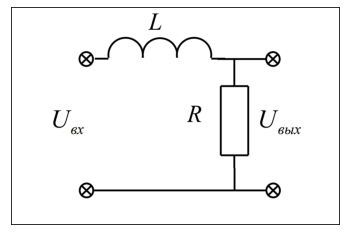

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image
plt.xticks([])
plt.yticks([])
plt.imshow(Image.open('integ.png'))
plt.show()

## Линейный оператор интегрирующей RL-цепи.

Для реализации линейного опреатора интегрирующей RL-цепи

\begin{equation}
U_{out}(t) = A \: U_{in}(t) =\frac{1}{\tau^*}\int_{0}^t U_{in}(\tau) d \tau ,
\end{equation}
воспользуемся численным методом интегрирования.


Пусть входной сигнал $U_{in}(t)$ задан на отрезке $[0, T]$. Разобъем этот отрезок на одинаковые части длиной $h$. При этом получим равномерную сетку из $N+1$ узлов:
\begin{equation}
\Delta x_0 = [x_0,\:x_1], ..., \Delta x_{N-1} = [x_{N-1},\: x_N]; \; x_0 = 0; \; x_i-x_{i-1} = h, \;i = 1, ..., N; \; x_N = T.
\end{equation}

На каждом отрезке сетки выберем серединные точки:
\begin{equation}
\xi_i = x_i +\frac{h}{2}, \; i = 0, ..., N-1.
\end{equation}

Тогда приближенное значение интеграла в точке $\xi_n$ записывается следующим образом:
\begin{equation}
U_{out}(\xi_n) =A\:U_{in}(t) = \frac{1}{\tau^*} \sum_{i=0}^n U_{in}(\xi_i)\cdot (x_i-x_{i-1}). 
\end{equation}

Зафиксируем $N$, $T$, $h = \frac{T}{N}$. Тогда значения функции $U_{in}$ в точках $\xi_i$ зафиксированной сетки можно представить в виде столбца высотой N. Введем евклидово пространство столбцов высоты N с скалярным произведением:
$$
(x, \;y) = \sum_{i=1}^N x_i \cdot y_i
$$
В этом прстрантсве выберем ОНБ:
$$
e_1 = 
\begin{pmatrix}
  1\\
  0\\
 \vdots\\
 0\\
\end{pmatrix}, \;
e_2 = 
\begin{pmatrix}
  0\\
  1\\
 \vdots\\
 0\\
\end{pmatrix}
e_N = 
\begin{pmatrix}
  0\\
  0\\
 \vdots\\
 1\\
\end{pmatrix}
$$
Матрица приближенного интегрирующего оператора в этом базисе будет выглядить следующим образом:
$$
\widetilde{A} = \frac{1}{\tau^*}
\begin{pmatrix}
  h& 0&  ...& 0\\
  h&h&...&0\\
 \vdots &\vdots& &\vdots\\
 h&h&...&h\\
\end{pmatrix}
$$

Поэтому операцию интегрирования можно представить как
\begin{equation}
\begin{pmatrix}
  U_{out}(\xi_1)\\
  U_{out}(\xi_2)\\
 \vdots\\
 U_{out}(\xi_N)\\
\end{pmatrix}
=\frac{1}{\tau^*}
\begin{pmatrix}
  h& 0&  ...& 0\\
  h&h&...&0\\
 \vdots &\vdots& &\vdots\\
 h&h&...&h\\
\end{pmatrix}
\begin{pmatrix}
  U_{in}(\xi_1)\\
  U_{in}(\xi_2)\\
 \vdots\\
 U_{in}(\xi_N)\\
\end{pmatrix}
\end{equation}


## Реализация оператора интегрирующей RL-цепи.

В дальнейшем выберем отрезок $[0, 2\pi]$ в качестве области задания входного сигнала. Пусть $N=100, \; h = \frac{2\pi}{N}, \: \tau^* = 1000 \gg 2\pi$.
Реализуем оператор интегрирующей RL-цепи и проверим корректность ее работы.

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

In [2]:
N = 100
a = 0
b = 2*np.pi
h = b/N
tau = 10
x_s = torch.linspace(start=a+h/2, end=b, steps=N, requires_grad=False)

In [3]:
def create_matrix(N, delta=1):
  A = torch.zeros([N,N], requires_grad=False)
  for i in range(N-1, -1, -1):
    for j in range(0, i+1):
      A[i, j] = delta
  return A/tau
A =  create_matrix(N, delta=h)
print(A.numpy().round(5))

[[0.00628 0.      0.      ... 0.      0.      0.     ]
 [0.00628 0.00628 0.      ... 0.      0.      0.     ]
 [0.00628 0.00628 0.00628 ... 0.      0.      0.     ]
 ...
 [0.00628 0.00628 0.00628 ... 0.00628 0.      0.     ]
 [0.00628 0.00628 0.00628 ... 0.00628 0.00628 0.     ]
 [0.00628 0.00628 0.00628 ... 0.00628 0.00628 0.00628]]


Пусть $U_{in}(t) = sin(t), \; t \in [0, 2\pi] $. Тогда $U_{out}(t) =  \frac{1}{\tau^*}\int_{0}^t sin\tau d\tau = \frac{1 - cos(t)}{\tau^*}.$
Проверим, корректность работы реализованного оператора.

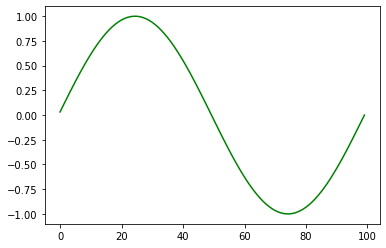

In [4]:
U_in = torch.zeros(size=(N, 1), requires_grad=False)
U_out_real = torch.zeros(size=(N, 1), requires_grad=False)
for i in range(N):
  U_in[i] = torch.sin(x_s[i])
  U_out_real[i] = (1-torch.cos(x_s[i]))/tau
U_out = torch.matmul(A, U_in)

plt.plot(U_in, color='green')
plt.show()

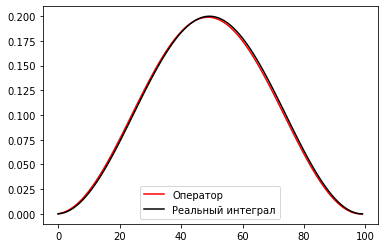

In [5]:
plt.plot(U_out, color='red', label='Оператор')
plt.plot(U_out_real, color='black', label='Реальный интеграл')
plt.legend()
plt.show()

Для минимизации функционала $L(x) = \| Ax-y \|^2 + \omega \|x\|^2$ воспользуемся градиентным спуском. Для этого зафиксируем начальное значение функционала $x_0 =
\begin{pmatrix}
  0\\
  0\\
 \vdots\\
 0\\
\end{pmatrix} $. Шаг градиентного спуска выберем равным $lr = 0.01$. Количество эпох пусть будет равно 10000.

In [6]:
x_0 = torch.zeros(size=(N, 1), requires_grad=True)

lr = 0.01
e = 20000
optimizer = torch.optim.SGD([x_0], lr)

Запустим градиентный спуск для $\omega = 10^{-3}$.

In [7]:
omega = 10e-3
for epoch in range(e):
    optimizer.zero_grad()
    loss = torch.norm(torch.matmul(A,x_0)-U_in)**2 + omega * torch.norm(x_0)**2
    loss.backward()
    optimizer.step()
    if epoch%1000 == 0:
       print("loss: {} epoch: {}".format(loss.detach().numpy(), epoch))

loss: 49.74874496459961 epoch: 0
loss: 30.03040313720703 epoch: 1000
loss: 24.661251068115234 epoch: 2000
loss: 22.5775089263916 epoch: 3000
loss: 21.723209381103516 epoch: 4000
loss: 21.353073120117188 epoch: 5000
loss: 21.18430519104004 epoch: 6000
loss: 21.103973388671875 epoch: 7000
loss: 21.064420700073242 epoch: 8000
loss: 21.04445457458496 epoch: 9000
loss: 21.034189224243164 epoch: 10000
loss: 21.028846740722656 epoch: 11000
loss: 21.026031494140625 epoch: 12000
loss: 21.024539947509766 epoch: 13000
loss: 21.023738861083984 epoch: 14000
loss: 21.023313522338867 epoch: 15000
loss: 21.02307891845703 epoch: 16000
loss: 21.02295684814453 epoch: 17000
loss: 21.022890090942383 epoch: 18000
loss: 21.02285385131836 epoch: 19000


Посмотрим на результат и сравним его с пакетной реализацией псевдообращения в библиотеке PyTorch.

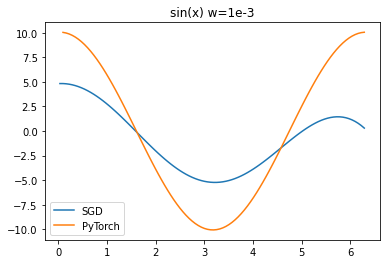

In [8]:
plt.axis()
plt.plot(x_s, x_0.detach(), label='SGD')
plt.plot(x_s[1:], torch.matmul(torch.linalg.pinv(A), U_in)[1:], label='PyTorch')
plt.title('sin(x) w=1e-3')
plt.legend()

In [9]:
x_0 = None
x_1 = torch.zeros(size=(N, 1), requires_grad=True)

omega = 10e-4
optimizer1 = torch.optim.SGD([x_1], 0.01)
for epoch in range(20000):
    optimizer1.zero_grad()
    loss = torch.norm(torch.matmul(A,x_1)-U_in)**2 + omega * torch.norm(x_1)**2
    loss.backward()
    optimizer1.step()
    if epoch%1000 == 0:
       print("loss: {} epoch: {}".format(loss.detach().numpy(), epoch))

loss: 49.74874496459961 epoch: 0
loss: 27.310091018676758 epoch: 1000
loss: 18.309457778930664 epoch: 2000
loss: 13.294068336486816 epoch: 3000
loss: 10.341734886169434 epoch: 4000
loss: 8.50528335571289 epoch: 5000
loss: 7.303337097167969 epoch: 6000
loss: 6.48229455947876 epoch: 7000
loss: 5.902392387390137 epoch: 8000
loss: 5.482514381408691 epoch: 9000
loss: 5.1729736328125 epoch: 10000
loss: 4.9417572021484375 epoch: 11000
loss: 4.767331123352051 epoch: 12000
loss: 4.634709358215332 epoch: 13000
loss: 4.533195495605469 epoch: 14000
loss: 4.455018997192383 epoch: 15000
loss: 4.394458770751953 epoch: 16000
loss: 4.347268581390381 epoch: 17000
loss: 4.310275077819824 epoch: 18000
loss: 4.281092643737793 epoch: 19000


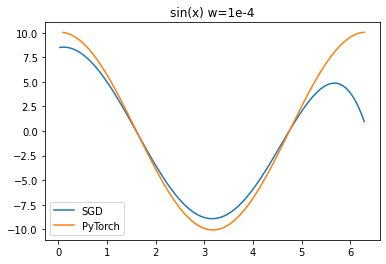

In [10]:
plt.axis()
plt.plot(x_s, x_1.detach(), label='SGD')
plt.plot(x_s[1:], torch.matmul(torch.linalg.pinv(A), U_in)[1:], label='PyTorch')
plt.title('sin(x) w=1e-4')
plt.legend()

In [11]:
x_0 = None
x_1 = torch.zeros(size=(N, 1), requires_grad=True)

omega = 10e-10
optimizer1 = torch.optim.SGD([x_1], 0.01)
for epoch in range(20000):
    optimizer1.zero_grad()
    loss = torch.norm(torch.matmul(A,x_1)-U_in)**2 + omega * torch.norm(x_1)**2
    loss.backward()
    optimizer1.step()
    if epoch%1000 == 0:
       print("loss: {} epoch: {}".format(loss.detach().numpy(), epoch))

loss: 49.74874496459961 epoch: 0
loss: 26.970714569091797 epoch: 1000
loss: 17.432144165039062 epoch: 2000
loss: 11.899038314819336 epoch: 3000
loss: 8.508382797241211 epoch: 4000
loss: 6.312808990478516 epoch: 5000
loss: 4.816936016082764 epoch: 6000
loss: 3.75327730178833 epoch: 7000
loss: 2.9712798595428467 epoch: 8000
loss: 2.381922483444214 epoch: 9000
loss: 1.9296836853027344 epoch: 10000
loss: 1.578076958656311 epoch: 11000
loss: 1.3019965887069702 epoch: 12000
loss: 1.0835108757019043 epoch: 13000
loss: 0.9094448685646057 epoch: 14000
loss: 0.7699199318885803 epoch: 15000
loss: 0.6574233770370483 epoch: 16000
loss: 0.5661836266517639 epoch: 17000
loss: 0.4917365610599518 epoch: 18000
loss: 0.4306122362613678 epoch: 19000


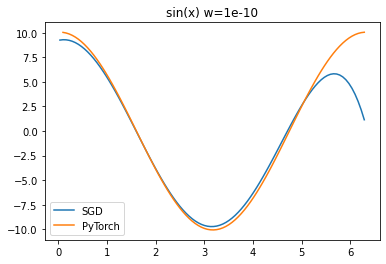

In [12]:
plt.axis()
plt.plot(x_s, x_1.detach(), label='SGD')
plt.plot(x_s[1:], torch.matmul(torch.linalg.pinv(A), U_in)[1:], label='PyTorch')
plt.title('sin(x) w=1e-10')
plt.legend()

Протестируем работу градиентного спуска на примере входного сигнала $U_{in}(t) = t, \;t \in [0, 2\pi].$

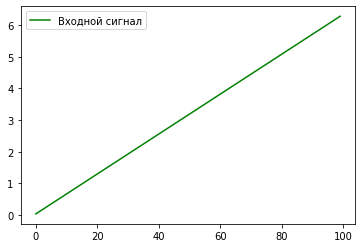

In [13]:
U_in = torch.zeros(size=(N, 1), requires_grad=False)
U_out_real = torch.zeros(size=(N, 1), requires_grad=False)
for i in range(N):
  U_in[i] = x_s[i]
  U_out_real[i] = x_s[i]**2/2/tau
U_out = torch.matmul(A, U_in)
plt.plot(U_in, color='green', label='Входной сигнал')
plt.legend()

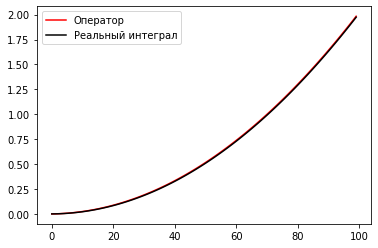

In [14]:
plt.plot(U_out, color='red', label='Оператор')
plt.plot(U_out_real, color='black', label='Реальный интеграл')
plt.legend()

In [20]:
x_0 = None
x_1 = None
x_2 = torch.zeros(size=(N, 1), requires_grad=True)

omega = 10e-10
optimizer3 = torch.optim.SGD([x_2], 0.01)

for epoch in range(20000):
    optimizer3.zero_grad()
    loss = torch.norm(torch.matmul(A,x_2)-U_in)**2 + omega * torch.norm(x_2)**2
    loss.backward()
    optimizer3.step()
    if epoch%1000 == 0:
       print("loss: {} epoch: {}".format(loss.detach().numpy(), epoch))

loss: 1329.139892578125 epoch: 0
loss: 12.83853816986084 epoch: 1000
loss: 6.094013690948486 epoch: 2000
loss: 3.65187406539917 epoch: 3000
loss: 2.3555471897125244 epoch: 4000
loss: 1.636934757232666 epoch: 5000
loss: 1.2162785530090332 epoch: 6000
loss: 0.9538170099258423 epoch: 7000
loss: 0.7787635922431946 epoch: 8000
loss: 0.6545414328575134 epoch: 9000
loss: 0.5616817474365234 epoch: 10000
loss: 0.4894053637981415 epoch: 11000
loss: 0.43144217133522034 epoch: 12000
loss: 0.3839341700077057 epoch: 13000
loss: 0.34435126185417175 epoch: 14000
loss: 0.3109655976295471 epoch: 15000
loss: 0.2825135886669159 epoch: 16000
loss: 0.2580582797527313 epoch: 17000
loss: 0.236877903342247 epoch: 18000
loss: 0.21840834617614746 epoch: 19000


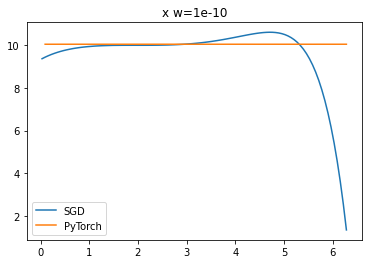

In [21]:
plt.axis()
plt.plot(x_s, x_2.detach(), label='SGD')
plt.plot(x_s[1:], torch.matmul(torch.linalg.pinv(A), U_in)[1:], label='PyTorch')
plt.title('x w=1e-10')
plt.legend()

Протестируем работу градиентного спуска на примере входного сигнала $U_{in}(t) = e^t, \;t \in [0, 2\pi].$

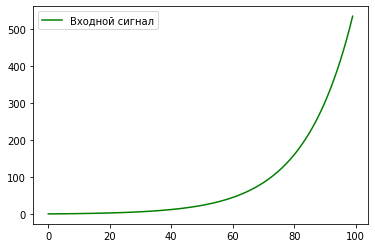

In [22]:
U_in = torch.zeros(size=(N, 1), requires_grad=False)
U_out_real = torch.zeros(size=(N, 1), requires_grad=False)
for i in range(N):
  U_in[i] = torch.exp(x_s[i])
  U_out_real[i] = torch.exp(x_s[i])/tau
U_out = torch.matmul(A, U_in)
plt.plot(U_in, color='green', label='Входной сигнал')
plt.legend()

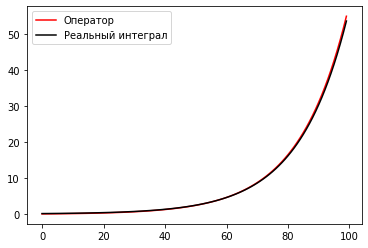

In [23]:
plt.plot(U_out, color='red', label='Оператор')
plt.plot(U_out_real, color='black', label='Реальный интеграл')
plt.legend()

In [24]:
x_0 = None
x_1 = None
x_2 = None
x_3 = torch.zeros(size=(N, 1), requires_grad=True)

omega = 10e-10
optimizer4 = torch.optim.SGD([x_3], 1)

for epoch in range(20000):
    optimizer4.zero_grad()
    loss = torch.norm(torch.matmul(A,x_3)-U_in)**2 + omega * torch.norm(x_3)**2
    loss.backward()
    optimizer4.step()
    if epoch%1000 == 0:
       print("loss: {} epoch: {}".format(loss.detach().numpy(), epoch))

loss: 2416813.25 epoch: 0
loss: 4887.576171875 epoch: 1000
loss: 1721.30322265625 epoch: 2000
loss: 911.9482421875 epoch: 3000
loss: 573.0659790039062 epoch: 4000
loss: 395.7574462890625 epoch: 5000
loss: 290.2150573730469 epoch: 6000
loss: 221.8543701171875 epoch: 7000
loss: 174.84915161132812 epoch: 8000
loss: 141.05999755859375 epoch: 9000
loss: 115.92110443115234 epoch: 10000
loss: 96.69816589355469 epoch: 11000
loss: 81.66678619384766 epoch: 12000
loss: 69.69489288330078 epoch: 13000
loss: 60.00523376464844 epoch: 14000
loss: 52.061100006103516 epoch: 15000
loss: 45.47380065917969 epoch: 16000
loss: 39.954750061035156 epoch: 17000
loss: 35.288917541503906 epoch: 18000
loss: 31.314592361450195 epoch: 19000


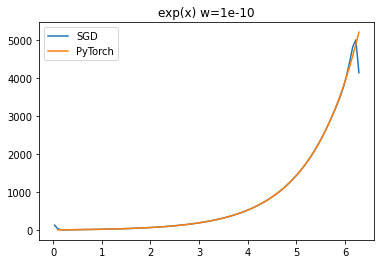

In [25]:
plt.axis()
plt.plot(x_s, x_3.detach(), label='SGD')
plt.plot(x_s[1:], torch.matmul(torch.linalg.pinv(A), U_in)[1:], label='PyTorch')
plt.title('exp(x) w=1e-10')
plt.legend()